In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Load the Dataset and Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML

df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

df_age = df_no_na[df_no_na["AGE"] > 21]
df_age

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


# 2. Split the Data into the Training and Validation Sets

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import display, HTML


feature_names = df_age.columns.drop(["LUNG_CANCER"])
X = df_age[feature_names].values
y = df_age["LUNG_CANCER"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 888)

# 3. Random Forest Classifier 
criterion = "entropy", class_weight = "balanced", n_estimators = 300  
With hyperparameter-tuning for max_depth and max_features.

In [8]:
#Initialize parameter grid
param_grid = {
    'max_depth': (None, 5, 10, 15, 20, 25, 30),
    'max_features':(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
}

# Initialize the Random Forest model
RF_classifier = RandomForestClassifier(random_state=888, criterion = "entropy", class_weight = "balanced", n_estimators = 300)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = RF_classifier, param_grid = param_grid, 
                           scoring = "f1", cv = 10, n_jobs = -1, verbose = 0)

# Train the model on the training data
grid_search.fit(X_train, y_train)
best_RF = grid_search.best_estimator_

# Predict on validation observations
y_pred = best_RF.predict(X_val)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Corresponding Accuracy Score: {accuracy_score(y_pred, y_val)}")
print(f"Corresponding Precision Score: {precision_score(y_pred, y_val)}")
print(f"Corresponding Recall Score: {recall_score(y_pred, y_val)}")
print(f"Corresponding F1 Score: {f1_score(y_pred, y_val)}")

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=300,
                                              random_state=888),
             n_jobs=-1,
             param_grid={'max_depth': (None, 5, 10, 15, 20, 25, 30),
                         'max_features': (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1)},
             scoring='f1')

Best Parameters: {'max_depth': 15, 'max_features': 0.4}
Corresponding Accuracy Score: 0.8783333333333333
Corresponding Precision Score: 0.9832402234636871
Corresponding Recall Score: 0.8783530879600748
Corresponding F1 Score: 0.927841845140033


<Figure size 1000x1000 with 0 Axes>

<BarContainer object of 15 artists>

Text(0, 0.5, 'Feature Importance')

Text(0.5, 1.0, 'Feature Importance in Random Forest')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'YELLOW_FINGERS'),
  Text(2, 0, 'ALCOHOL CONSUMING'),
  Text(3, 0, 'WHEEZING'),
  Text(4, 0, 'GENDER'),
  Text(5, 0, 'SWALLOWING DIFFICULTY'),
  Text(6, 0, 'SMOKING'),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'SHORTNESS OF BREATH'),
  Text(9, 0, 'PEER_PRESSURE'),
  Text(10, 0, 'FATIGUE '),
  Text(11, 0, 'CHRONIC DISEASE'),
  Text(12, 0, 'CHEST PAIN'),
  Text(13, 0, 'ANXIETY'),
  Text(14, 0, 'COUGHING')])

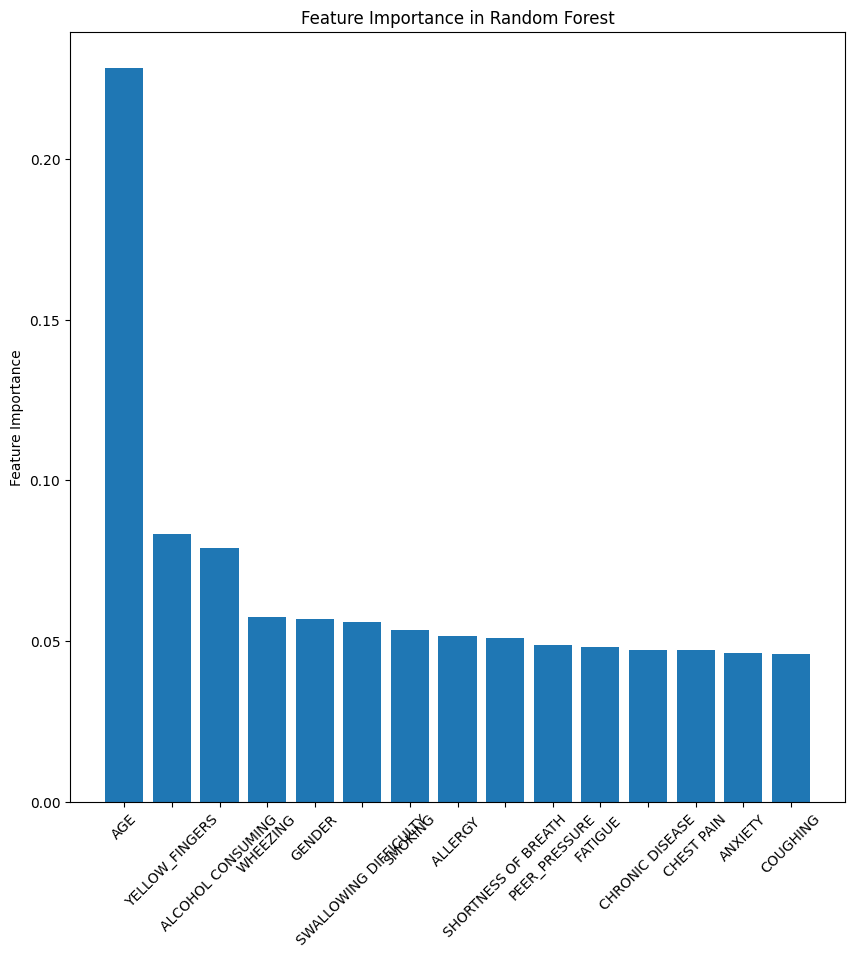

In [10]:
# Generate feature importances plot
feature_importances = best_RF.feature_importances_
indices = np.argsort(feature_importances)[::-1]     
plt.figure(figsize = (10, 10))    
plt.bar(np.array(feature_names)[indices], feature_importances[indices])
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=45)                                   
plt.show()